# Proyek Analisis Data : Bike Sharing Dataset

- Nama : Kevin Winardi
- Id Dicoding : kevinwinardi
- Sumber : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

## Menentukan Pertanyaan Bisnis

- Apakah musim mempengaruhi jumlah penyewa sepeda ?
- Apakah kondisi cuaca dalam hari itu mempengaruhi jumlah penyewa sepeda ?
- Apakah kecepatan angin mempengaruhi jumlah penyewa sepeda ?
- Kapan jam paling banyak orang menyewa sepda ?
- Apa kategori penyewa sepeda yang paling banyak ?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Mengupload file day.csv dan hour.csv
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (2).csv
Saving hour.csv to hour (2).csv


In [ ]:
#Membaca dataset hour.csv yang diupload
hour = pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#Membaca dataset day.csv yang diupload
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assesing Data

**Info**

In [ ]:
newdf = pd.merge(
    left=hour,
    right=day,
    how="inner",
    left_on="instant",
    right_on="instant"
)

newdf.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Mengecek info
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday_x      731 non-null    datetime64[ns]
 2   season_x      731 non-null    int64         
 3   yr_x          731 non-null    int64         
 4   mnth_x        731 non-null    int64         
 5   hr            731 non-null    int64         
 6   holiday_x     731 non-null    int64         
 7   weekday_x     731 non-null    int64         
 8   workingday_x  731 non-null    int64         
 9   weathersit_x  731 non-null    int64         
 10  temp_x        731 non-null    float64       
 11  atemp_x       731 non-null    float64       
 12  hum_x         731 non-null    float64       
 13  windspeed_x   731 non-null    float64       
 14  casual_x      731 non-null    int64         
 15  registered_x  731 non-null    int64     

Terdapat tipe kesalahan tipe data kolom dteday tertulis object (String) yang seharusnya tipe data datetime karena berupa tipe data waktu.

**Missing value**

In [ ]:
#Mengcek missing value dari day.csv
newdf.isnull().sum()

instant         0
dteday_x        0
season_x        0
yr_x            0
mnth_x          0
hr              0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
dteday_y        0
season_y        0
yr_y            0
mnth_y          0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

Tidak ada missing value data

**Duplikasi**

In [ ]:
#Mengecek jumlah duplikasi
print ("Duplikasi : ",newdf.duplicated().sum())

Duplikasi :  0


Tidak ada duplikasi data

### Cleaning Data

**Tipe data**

In [ ]:
#Mengatasi kesalahan tipe data dteday
newdf["dteday_x"] = pd.to_datetime(newdf["dteday_x"])
newdf["dteday_y"] = pd.to_datetime(newdf["dteday_y"])


In [ ]:
#Mengecek info dari data yang sudah diperbaiki
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dteday_x      731 non-null    datetime64[ns]
 2   season_x      731 non-null    int64         
 3   yr_x          731 non-null    int64         
 4   mnth_x        731 non-null    int64         
 5   hr            731 non-null    int64         
 6   holiday_x     731 non-null    int64         
 7   weekday_x     731 non-null    int64         
 8   workingday_x  731 non-null    int64         
 9   weathersit_x  731 non-null    int64         
 10  temp_x        731 non-null    float64       
 11  atemp_x       731 non-null    float64       
 12  hum_x         731 non-null    float64       
 13  windspeed_x   731 non-null    float64       
 14  casual_x      731 non-null    int64         
 15  registered_x  731 non-null    int64     

## Exploratory Data Analysis (EDA)

### Explore common

In [ ]:
#Describe
newdf.describe(include = "all")

<ipython-input-152-3831e8017616>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  newdf.describe(include = "all")
<ipython-input-152-3831e8017616>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  newdf.describe(include = "all")


,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,731.000000,731,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2011-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,1.0,0.0,1.058824,11.805746,0.032832,2.905609,0.645691,1.514364,...,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,0.0,0.0,0.235455,6.859492,0.178318,2.070830,0.478631,0.656474,...,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,1.0,0.0,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


### Explore season

In [ ]:
#day
expsea = newdf.groupby(by="season_y").agg({
    "cnt_y" : "sum"
})
print(expsea)

            cnt_y
season_y         
1          471348
2          918589
3         1061129
4          841613


Terlihat pada musim 3 (gugur) paling banyak menyewa sepeda.

### Explore weather situation

In [ ]:
#day
expwea = newdf.groupby(by = "weathersit_y").agg({
    "cnt_y" : "sum"
})
print(expwea)

                cnt_y
weathersit_y         
1             2257952
2              996858
3               37869


Terlihat dari data kalau kondisi cuaca pada kondisi 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian) lebih banyak penyewa sepeda.

### Explore wind speed

In [ ]:
#hour
expwind = newdf.groupby(by="windspeed_x").agg({
    "cnt_x" : "sum"
})
print(expwind)

             cnt_x
windspeed_x       
0.0000        4915
0.0896        3064
0.1045        3377
0.1343        3475
0.1642        3836
0.1940        3887
0.2239        3000
0.2537        2968
0.2836        3111
0.2985        1913
0.3284        2450
0.3582        1305
0.3881         931
0.4179         459
0.4478         670
0.4627         404
0.4925         186
0.5224         457
0.5522         251
0.5821         206


Terlihat dari data apabila semakin kencang angin bertiup maka semakin dikit penyewa sepeda.

### Explore hour

In [ ]:
#hour
exphour = newdf.groupby(by="hr").agg({
    "cnt_x" :"sum"
})
print(exphour)

    cnt_x
hr       
0     448
1     301
2     203
3      97
4      45
5     112
6     555
7    1574
8    3839
9    2619
10   1597
11   1729
12   2298
13   2345
14   2251
15   2335
16   2763
17   4394
18   3830
19   2725
20   1831
21   1317
22    987
23    670


Terlihat dari data banyak orang menyewa sepeda pada jam 17.

### Explore category renter

In [ ]:
#day
expcasual = newdf["casual_y"].sum()
expregistered = newdf["registered_y"].sum()

dictrent = {"Category" : ["Casual","Registered"],
            "Sum" : [expcasual,expregistered]
            }
exprent = pd.DataFrame(dictrent)
print(exprent)

     Category      Sum
0      Casual   620017
1  Registered  2672662


Terlihat dari data bahwa kategori penyewa terbanyak adalah yang sudah melakukan registrasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1 :

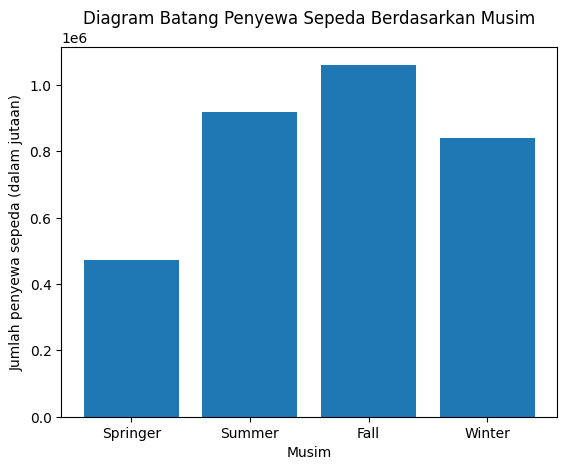

In [ ]:
season_x = ["Springer","Summer", "Fall", "Winter"]
season_y = newdf.groupby("season_y")["cnt_y"].sum()
plt.xlabel("Musim")
plt.ylabel("Jumlah penyewa sepeda (dalam jutaan)")
plt.bar(season_x, season_y)
plt.title("Diagram Batang Penyewa Sepeda Berdasarkan Musim")
plt.show()

Terlihat pada diagram batang tersebut, jumlah penyewa sepeda paling tinggi berada pada musim gugur (Fall)

### Pertanyaan 2 :

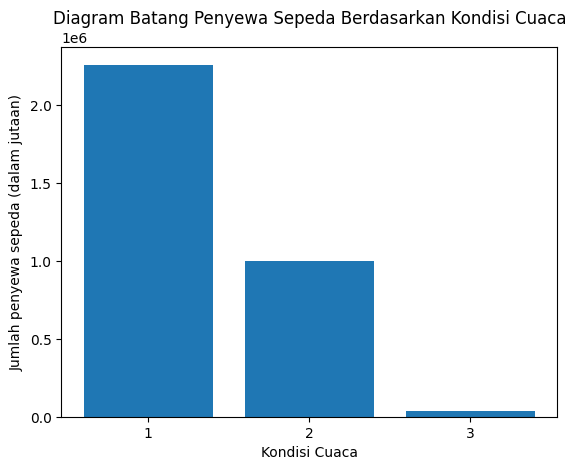

In [ ]:
weathersit_x = ["1","2","3"]
weathersit_y = newdf.groupby("weathersit_y")["cnt_y"].sum()
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah penyewa sepeda (dalam jutaan)")
plt.bar(weathersit_x, weathersit_y)
plt.title("Diagram Batang Penyewa Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

Terlihat pada grafik, banyak penyewa sepeda saat kondisi cuaca 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian).

### Pertanyaan 3 :

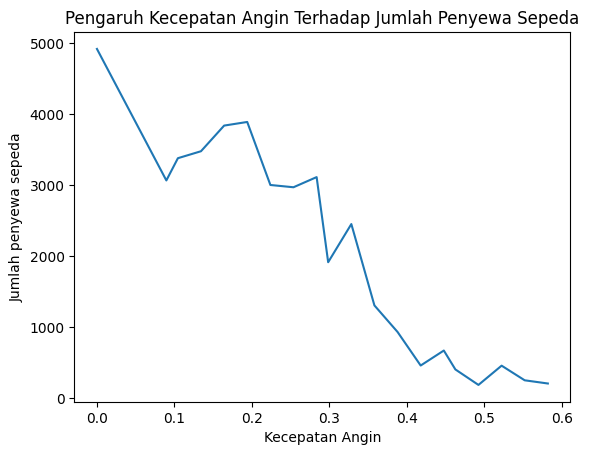

In [ ]:
sns.lineplot(x="windspeed_x",y="cnt_x",data=expwind)
plt.title("Pengaruh Kecepatan Angin Terhadap Jumlah Penyewa Sepeda")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah penyewa sepeda")
plt.show()

Terlihat dari data kalau kecepatan angin sangat mempengaruhi jumlah penyewa sepeda. Data akan menurun di saat angin bertiup kencang.

### Pertanyaan 4 :

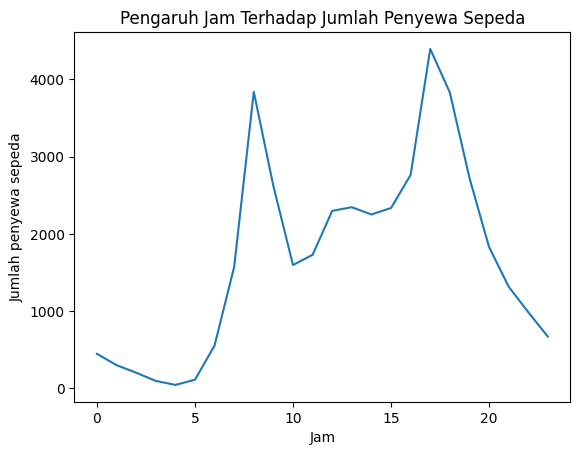

In [ ]:
sns.lineplot(x="hr",y="cnt_x",data=exphour)
plt.title("Pengaruh Jam Terhadap Jumlah Penyewa Sepeda")
plt.xlabel("Jam")
plt.ylabel("Jumlah penyewa sepeda")
plt.show()

Terlihat pada grafik, kalau pada rentang jam 15 sampai 20 paling banyak orang menyewa sepeda.

### Pertanyaan 5 :

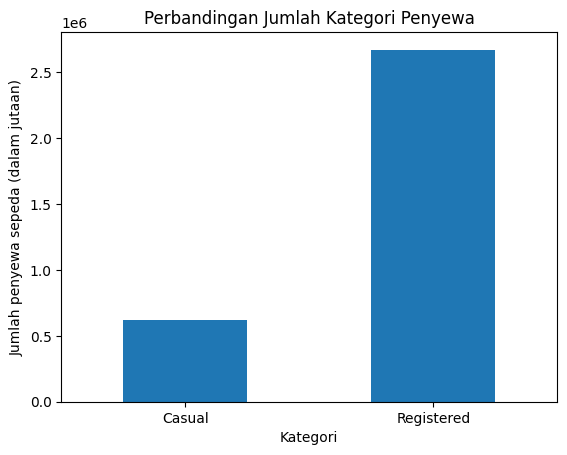

In [ ]:
exprent.plot(kind='bar', x="Category" ,rot = 0, legend = None);
plt.title("Perbandingan Jumlah Kategori Penyewa")
plt.xlabel("Kategori")
plt.ylabel("Jumlah penyewa sepeda (dalam jutaan)")
plt.show()

Terlihat pada grafik, kalau kategori penyewa sepeda paling banyak adalah yang sudah melakukan registrasi.

## Conclusion

- Apakah musim mempengaruhi jumlah penyewa sepeda ?


> Iya, terlihat pada grafik bahwa musim yang paling banyak orang menyewa sepeda jatuh pada musim gugur (Fall)



- Apakah kondisi cuaca dalam hari itu mempengaruhi jumlah penyewa sepeda ?


> Iya, terlihat pada grafik bahwa kondisi cuaca yang 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian) lebih banyak penyewa

- Apakah kecepatan angin mempengaruhi jumlah penyewa sepeda ?


> Iya, jika angin bertiup kencang, maka penyewa sepeda akan lebih sedikit.

- Kapan jam paling banyak orang menyewa sepda ?


> Pada pukul rentang 15 hingga 20, atau lebih tepatnya berada pada pukul 17.

- Apa kategori penyewa sepeda yang paling banyak ?


> Kategori penyewa sepeda paling banyak adalah yang sudah melakukan registrasi.

In [ ]:
newdf.to_csv("main_data.csv", index=False)